In [2]:
from scipy.io import savemat
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [7]:
# Mat = loadmat('data47.mat')
Mat = loadmat('data44.mat')

# mne info object 생성

In [8]:
ch_names = []
for i in range(61):
    ch_names.append(mat1['label'][i])  

In [9]:
n_channels = 61
sampling_freq = 500  # in Hertz
ch_types = ['eeg'] * 61
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq, verbose=True)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>

# read_epochs_fieldtrip

fieldtrip matlab file 형식으로 저장된 파일을 불

In [10]:
epoch1 = mne.read_epochs_fieldtrip('data44.mat', info, data_name='sub-01')

Not setting metadata
224 matching events found
No baseline correction applied


In [11]:
epoch1.filter(0.5, 36)

Setting up band-pass filter from 0.5 - 36 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 36.00 Hz
- Upper transition bandwidth: 9.00 Hz (-6 dB cutoff frequency: 40.50 Hz)
- Filter length: 3301 samples (6.602 sec)



C:\Users\lovej\AppData\Local\Temp\ipykernel_15176\2383955981.py:1: RuntimeWarning: filter_length (3301) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  epoch1.filter(0.5, 36)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 13664 out of 13664 | elapsed:    5.5s finished


Number of events,224
Events,1: 224
Time range,-1.000 – 3.998 sec
Baseline,off


    Using multitaper spectrum estimation with 7 DPSS windows


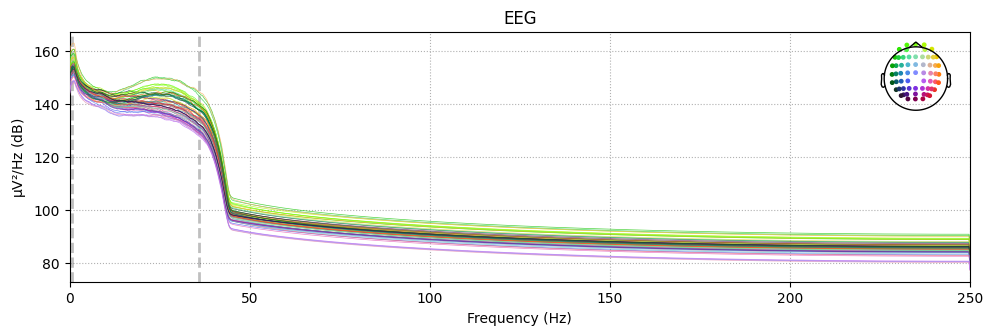

In [13]:
epoch1.plot_psd();

# 이벤트 설정

각 Epoch마다 실험 조건 별로 레이블링(이벤트) 해주는 과정

총 4가지 이벤트를 구성하였다. (Stick_Congruent=1, Stick_Incongruent=2, Avatar_Congruent=3, Avatar_Incongruent=4) 

In [14]:
event_id = dict(Stick_Congruent=1, Stick_Incongruent=2, Avatar_Congruent=3, Avatar_Incongruent=4) 

In [15]:
length = 224
ev = [i*500*5 for i in range(length)]

events = np.column_stack((np.array(ev,  dtype = int),
                          np.zeros(length,  dtype = int),
                          np.array(processed_data[0]['trialinfo'].T[0],  dtype = int)))


In [16]:
processed_data[0]['trialinfo'].T[0].shape

(224,)

In [17]:
epoch1.event_id = event_id

In [18]:
epoch1.event_id

{'Stick_Congruent': 1,
 'Stick_Incongruent': 2,
 'Avatar_Congruent': 3,
 'Avatar_Incongruent': 4}

In [19]:
epoch1.events = events

In [20]:
epoch1.events

array([[     0,      0,      2],
       [  2500,      0,      1],
       [  5000,      0,      2],
       [  7500,      0,      2],
       [ 10000,      0,      1],
       [ 12500,      0,      1],
       [ 15000,      0,      2],
       [ 17500,      0,      1],
       [ 20000,      0,      2],
       [ 22500,      0,      2],
       [ 25000,      0,      2],
       [ 27500,      0,      2],
       [ 30000,      0,      1],
       [ 32500,      0,      2],
       [ 35000,      0,      2],
       [ 37500,      0,      2],
       [ 40000,      0,      1],
       [ 42500,      0,      2],
       [ 45000,      0,      1],
       [ 47500,      0,      2],
       [ 50000,      0,      1],
       [ 52500,      0,      2],
       [ 55000,      0,      1],
       [ 57500,      0,      2],
       [ 60000,      0,      1],
       [ 62500,      0,      1],
       [ 65000,      0,      2],
       [ 67500,      0,      1],
       [ 70000,      0,      1],
       [ 72500,      0,      2],
       [ 7

# Evoke Data

조건 별로 구분된 데이터를 각 이벤트 별로 묶어서 평균내는 작업

EEG 데이터에서 Evoking은 잡음을 smoothing 해주고 반복되는 유의미한 신호를 강조해주는 영향을 미치기 때문에 분석에 활용된다.

In [21]:
epoch_sc = epoch1['Stick_Congruent'] 
epoch_si = epoch1['Stick_Incongruent']
epoch_ac = epoch1['Avatar_Congruent']
epoch_ai = epoch1['Avatar_Incongruent']

In [23]:
evoke_sc = epoch_sc.average()
evoke_si = epoch_si.average()
evoke_ac = epoch_ac.average()
evoke_ai = epoch_ai.average()

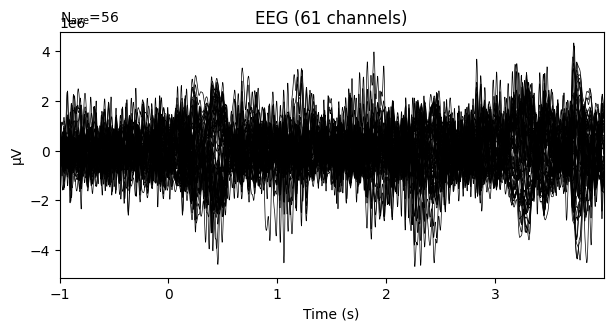

In [28]:
evoke_sc.plot();

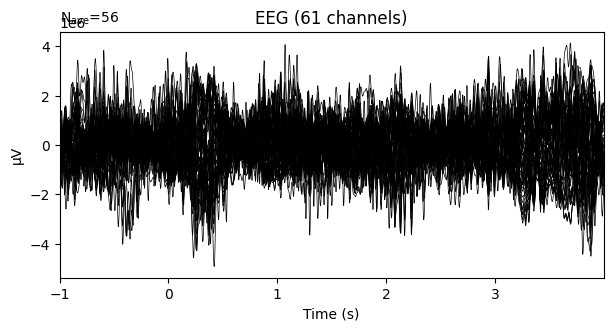

In [25]:
evoke_si.plot();

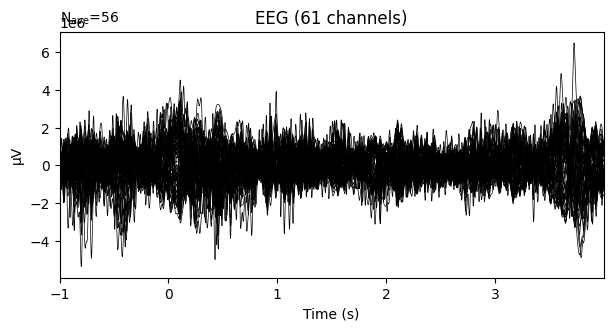

In [26]:
evoke_ac.plot();

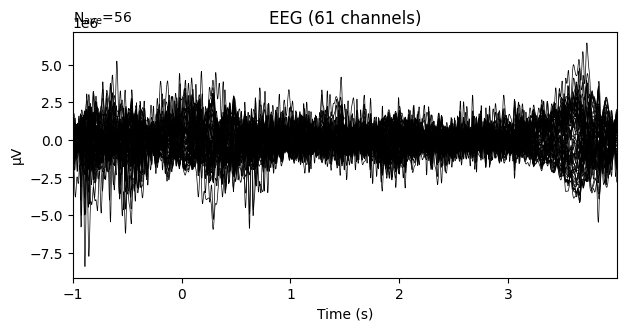

In [27]:
evoke_ai.plot();

# 실험 조건 별 뇌파 활성화 위치 시각화

Initializing animation...
Initializing animation...


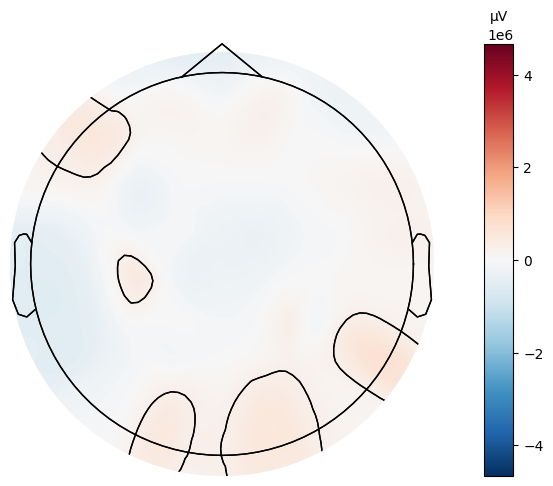

(<Figure size 600x500 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x133819e0bb0>)

In [32]:
evoke_sc.animate_topomap()

Initializing animation...
Initializing animation...


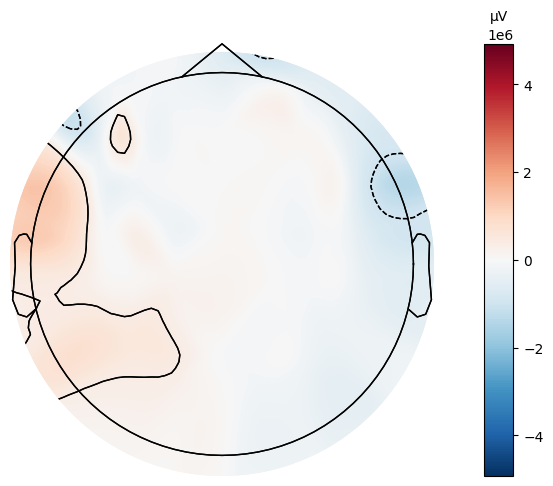

(<Figure size 600x500 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x1338be6a220>)

In [33]:
evoke_si.animate_topomap()

Initializing animation...
Initializing animation...


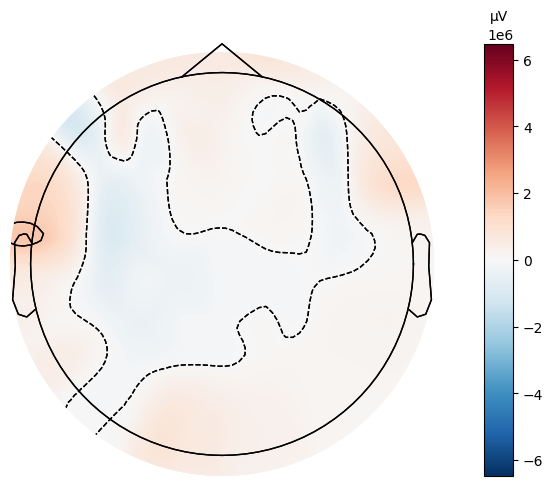

(<Figure size 600x500 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x1338ae6c190>)

In [34]:
evoke_ac.animate_topomap()

Initializing animation...
Initializing animation...


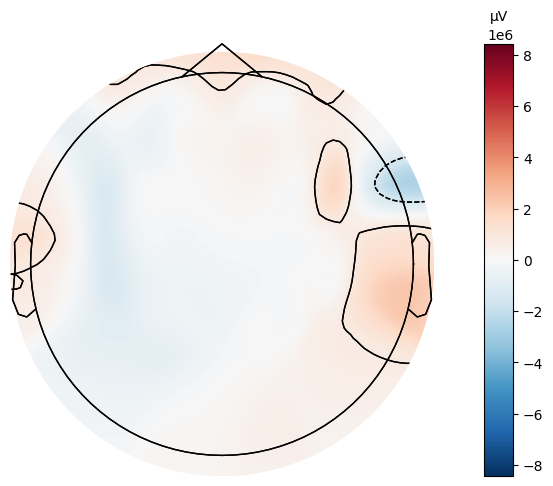

(<Figure size 600x500 with 2 Axes>,
 <matplotlib.animation.FuncAnimation at 0x1338bd7f790>)

In [35]:
evoke_ai.animate_topomap()

# 실험 조건 별 측정 시각에 따른 뇌파 변화 시각화

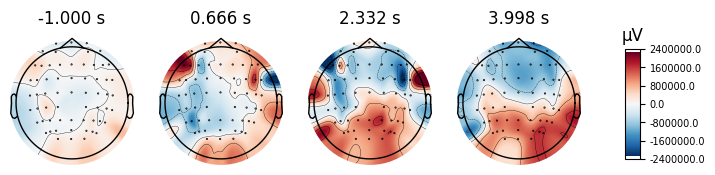

In [39]:
evoke_sc.plot_topomap();

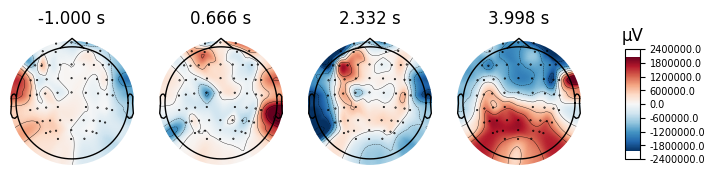

In [41]:
evoke_si.plot_topomap();

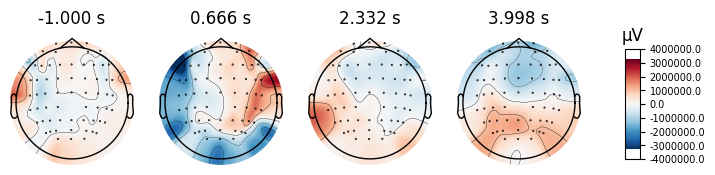

In [42]:
evoke_ac.plot_topomap();

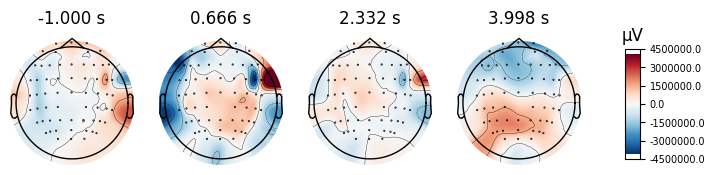

In [40]:
evoke_ai.plot_topomap();

# 실험 조건 별 EEG 채널 별 활성 정도 시각화

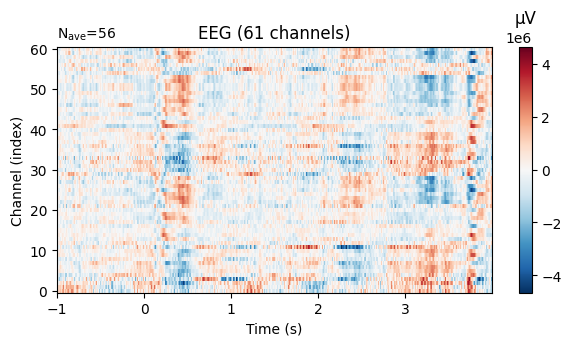

In [44]:
evoke_sc.plot_image();

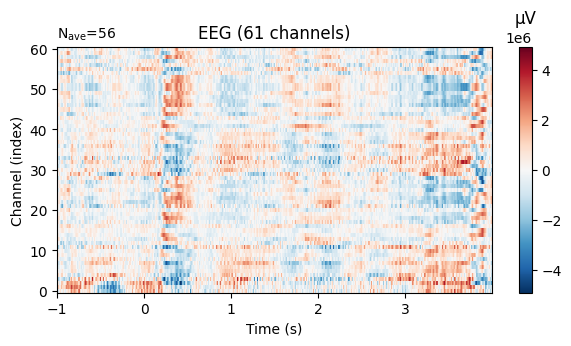

In [45]:
evoke_si.plot_image();

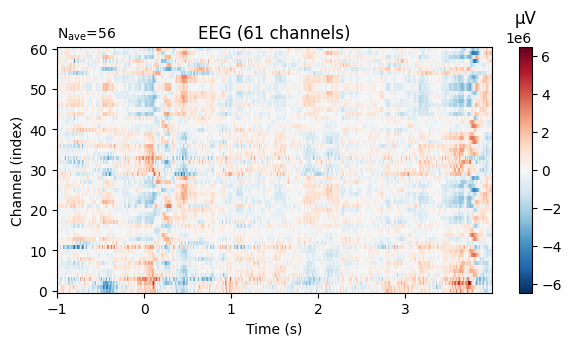

In [46]:
evoke_ac.plot_image();

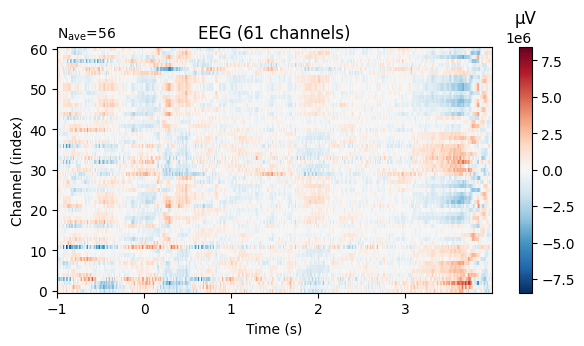

In [47]:
evoke_ai.plot_image();

# 변동 심한 측정 시각

No projector specified for this dataset. Please consider the method self.add_proj.


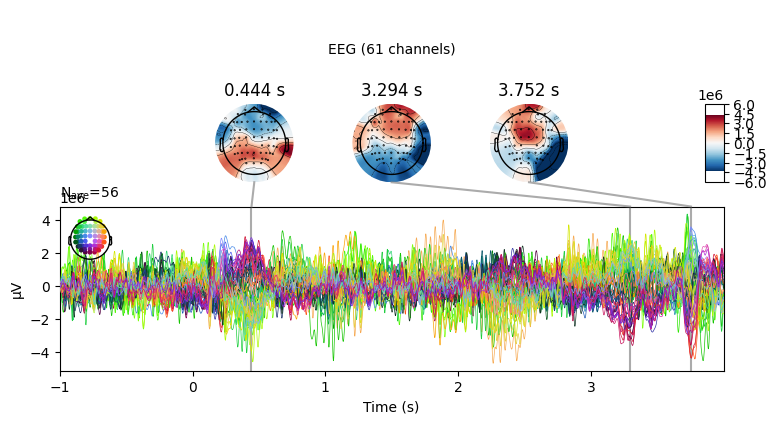

In [29]:
evoke_sc.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


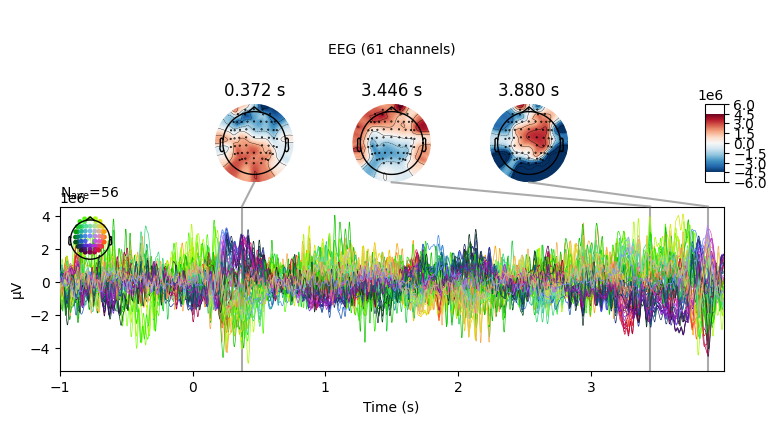

In [30]:
evoke_si.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


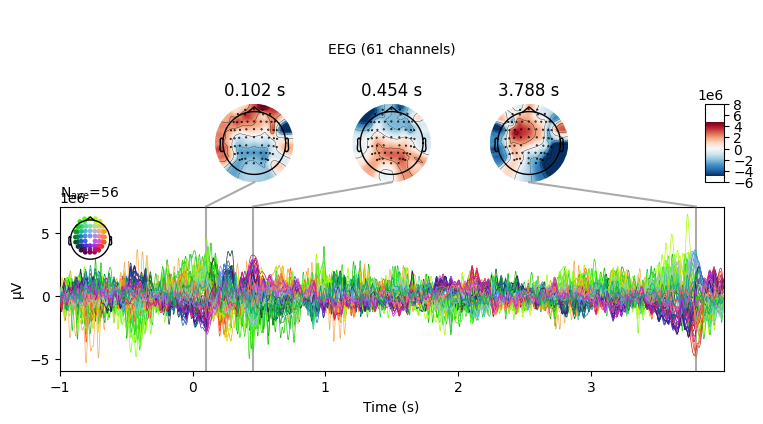

In [31]:
evoke_ac.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


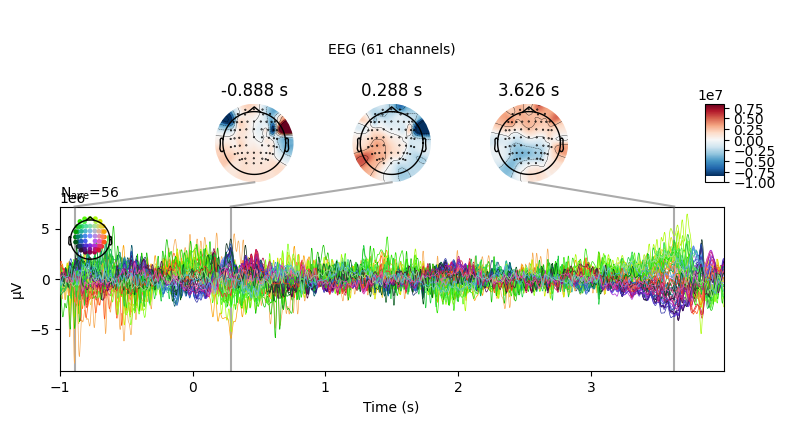

In [32]:
evoke_ai.plot_joint();